In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


모든 데이터 불러오기 및 데이터 합치기.

In [3]:
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')
df_all_raw = pd.concat([df_test_raw, df_test_raw], axis=0)



원본 데이터를 따로 선언해서 저장하는이유는 아래와 같다.
1. 예기치 않은 동작을 했을때 새로 데이터를 받아와서 수행하는것은 매우 값비싼 연산이다.
2. 데이터 분석, 전처리에 대한 판단은 정답이랄게 없고, 계속 반복 수행이 되기때문에 재사용을 위해서도 좋다.

In [6]:
df_train = df_train_raw
df_test = df_test_raw
df_all = df_all_raw

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


데이터 분석시
1. 주관적 해석 선택
2. 상관계수 행렬등으로 수치적으로 특징을 선택

[1, 2, 3, 4]

데이터 들에 대한 결측치 조사

In [98]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
df_all.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          654
Embarked         0
dtype: int64

In [101]:
#결측치를 조사했으니, 이에 대한 판단을 해보자. Age와 Cabin은 결측치 비율이 너무많다. 버리자.
df_train.drop(columns=['Age', 'Cabin'], inplace=True)
df_test.drop(columns=['Age', 'Cabin'], inplace=True)
df_all.drop(columns=['Age', 'Cabin'], inplace=True)

In [7]:
df_dropped_train = df_train_raw.drop(columns=['Age', 'Cabin'])
df_dropped_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [102]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


개별 데이터 들에 대한 판단을 해보자

In [103]:
numeric_data = df_train.select_dtypes(include=['number'])
non_numeric_data = df_train.select_dtypes(exclude=['number'])

numeric_data

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,3,1,2,23.4500
889,890,1,1,0,0,30.0000


In [8]:
df_names = df_train['Name']
name = df_names[1]
name_df = df_train['Name'].str.split(pat='[,.]', n=2, expand = True)
df_honorific = name_df[1]
df_honorific = df_honorific.str.strip()
df_honorific

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 1, Length: 891, dtype: object

이름중 지위를 나타내는 중간부분을 통해서 어떤 의미있는 데이터를 유추할수 있을수도 있다.

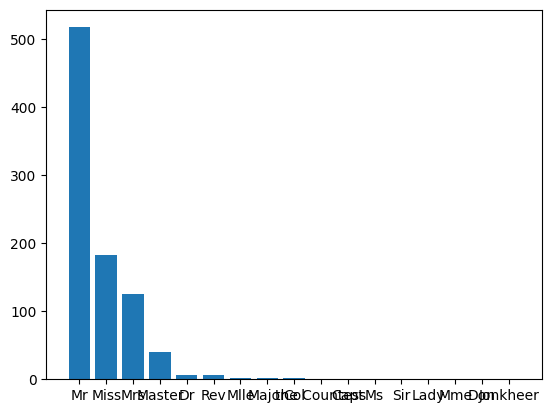

In [105]:
honorific_value_count = df_honorific.value_counts()
plt.bar(honorific_value_count.index, honorific_value_count.values)
plt.show()

In [106]:
def honorific_classify(honorific):
    honorific_list = ['Mr', 'Miss', 'Mrs', 'Master']
    return honorific if honorific in honorific_list else 'else'

df_classified_honorific = df_honorific.apply(honorific_classify)
df_classified_honorific.value_counts()

1
Mr        517
Miss      182
Mrs       125
Master     40
else       27
Name: count, dtype: int64

성별에 관해서도 라벨 인코딩을 진행하자.

In [107]:
df_sex_train = df_train['Sex'].apply(lambda x : 1 if x=='male' else 0)

정박지가 3곳임으로 이를 원-핫인코딩 해보자

In [108]:
df_train.dropna(subset=['Embarked'],inplace=True)
df_train['Embarked'].isnull().sum()

0

In [109]:
from sklearn.preprocessing import OneHotEncoder
df_embarked = df_train['Embarked'].values
embarked_ohe = OneHotEncoder()
df_ohe_embarked = embarked_ohe.fit_transform(df_embarked.reshape(-1, 1)).toarray()
embarked_list = embarked_ohe.categories_[0]
df_ohe_embarked = pd.DataFrame(df_ohe_embarked,columns=embarked_list)
df_ohe_embarked

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


생각해보니 명칭에 대한 원한 인코딩도 까먹었다. 지금 해놓자.

In [110]:
df_ohe_honorific = df_classified_honorific
honorific_ohe = OneHotEncoder()
df_ohe_honorific_array =  honorific_ohe.fit_transform(df_ohe_honorific.values.reshape(-1, 1)).toarray()
honorific_list = honorific_ohe.categories_[0]
df_ohe_honorific = pd.DataFrame(df_ohe_honorific_array, columns=honorific_list)
df_ohe_honorific

,Master,Miss,Mr,Mrs,else
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,0.0
888,0.0,1.0,0.0,0.0,0.0
889,0.0,0.0,1.0,0.0,0.0


In [111]:
# Name, Ticket, Sex, Embarked 제거
# df_sex_train, df_ohe_embarked는 합치기.
df_train.drop(columns=['Name', 'Ticket', 'Sex', 'Embarked'], inplace=True)
df_train = pd.concat([df_train, df_sex_train, df_ohe_honorific, df_ohe_embarked], axis=1)
df_train


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex,Master,Miss,Mr,Mrs,else,C,Q,S
0,1.0,0.0,3.0,1.0,0.0,7.2500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,1.0,0.0,71.2833,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,0.0,0.0,7.9250,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,1.0,0.0,53.1000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,0.0,0.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,1.0,2.0,23.4500,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
889,890.0,1.0,1.0,0.0,0.0,30.0000,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
890,891.0,0.0,3.0,0.0,0.0,7.7500,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


해쉬맵 상관계수 행렬 보기

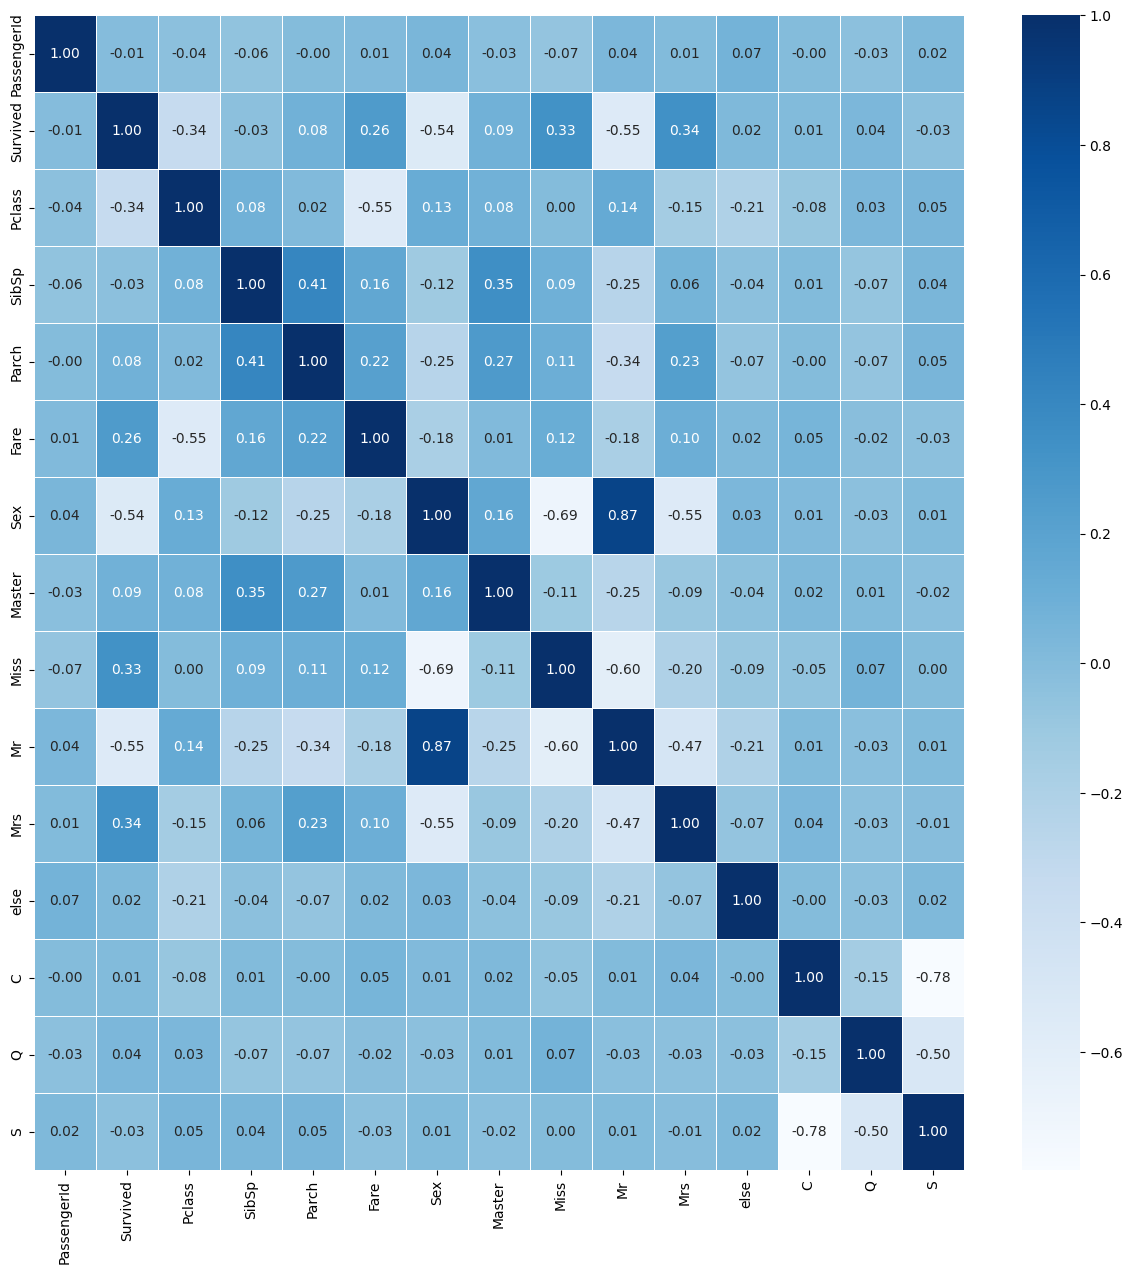

In [113]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=df_train.corr(), annot=True,
            fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

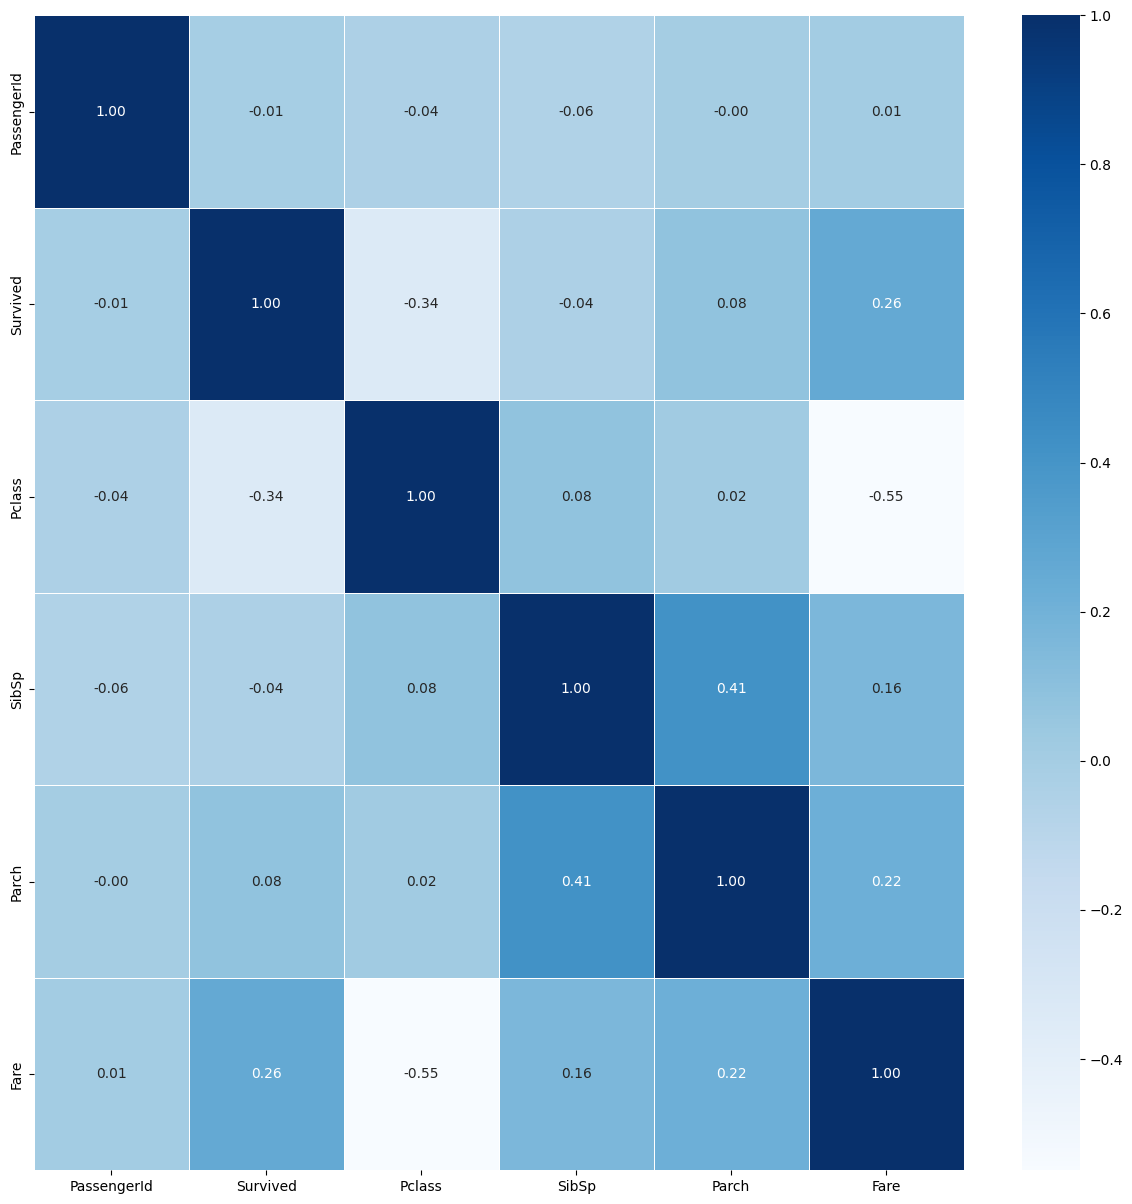

In [114]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=numeric_data.corr(), annot=True,
            fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()